# Multiple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [3]:
dataset = pd.read_csv('./datasets/auto-mpg.csv')
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
data = dataset.iloc[:, :6]
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130,3504,12.0
1,15.0,8,350.0,165,3693,11.5
2,18.0,8,318.0,150,3436,11.0
3,16.0,8,304.0,150,3433,12.0
4,17.0,8,302.0,140,3449,10.5


In [6]:
data.shape

(398, 6)

In [7]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
dtype: object

In [11]:
horsepower_nulls = np.nonzero(~data.horsepower.str.isdigit())[0]
horsepower_nulls

array([ 32, 126, 330, 336, 354, 374], dtype=int64)

In [13]:
data = data.replace('?', np.nan)
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
dtype: int64

In [14]:
data['horsepower'] = data['horsepower'].fillna(data['horsepower'].astype('float64').median())

In [15]:
y = np.asanyarray(data['mpg'])
x = np.asanyarray(data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']])

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=1)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [18]:
model.coef_

array([-0.17218462, -0.00441944, -0.04176711, -0.00530535,  0.01449512])

In [19]:
model.intercept_

45.10291914699508

In [20]:
y_pred = model.predict(x_test)

In [21]:
frame = pd.DataFrame({
    'cylinders': x_test[:, 0],
    'displacement': x_test[:, 1],
    'horsepower': x_test[:, 2],
    'weight': x_test[:, 3],
    'acceleration': x_test[:, 4],
    'Real': y_test,
    'Predicted': y_pred
})
frame

,cylinders,displacement,horsepower,weight,acceleration,Real,Predicted
0,6,171.0,97,2984,14.5,18.0,23.641699
1,4,141.0,80,3230,20.4,28.1,23.609098
2,8,318.0,140,3735,13.2,19.4,16.848527
3,5,131.0,103,2830,15.9,20.3,24.577376
4,6,232.0,90,3265,18.2,20.2,22.227313
...,...,...,...,...,...,...,...
75,4,90.0,75,2125,14.5,28.0,29.820213
76,5,121.0,67,2950,19.9,36.4,25.546525
77,8,318.0,145,4140,13.7,15.5,14.498273
78,8,351.0,148,4657,13.5,14.0,11.481367


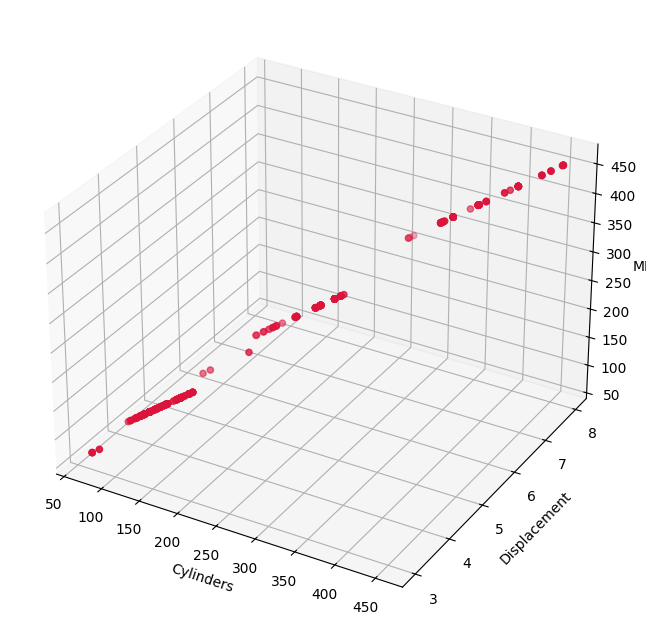

In [32]:
fig = plt.figure(figsize=(10,8))
multiple = fig.add_subplot(111, projection='3d')
multiple.scatter(x[:, 1], x[:, 0], x[:, 1], color='crimson')
multiple.set_xlabel('Cylinders')
multiple.set_ylabel('Displacement')
multiple.set_zlabel('MPG')
plt.show()

In [38]:
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
print(f"r2 is: {r2} and mse is: {mse}")

r2 is: 0.7811927213436106 and mse is: 12.327847895803096
